## Name:

# Title:

# Introduction:



# Data Collection and Processing:

retrieve hospital rank and covid death data

establish credibility of statista and newsweek, explain methodology and how it pertains to credibility

**what do we need to import for this step???**

**explain how we are retrieving the data using pandas.read_html**

**explain that we had forbidden access to newsweek so we found a workaroud**

In [22]:
import pandas as pd
import lxml

# as of 12/13/2021
covid_url = "https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/"

results = pd.read_html(covid_url)
#response


**because there are two tables found in our response, we'll only use the table we need**

In [23]:
covid_df = results[0]
covid_df

,Characteristic,Confirmed cases (absolute),Cases in last 7 days,Confirmed deaths (absolute),Deaths in last 7 days,Daily increase (# deaths),Population (in millions),Deaths per million (total),Deaths per million (last 7 days)
0,Peru,2254373,10958,201770,391,37,32.51,6206.31,12.03
1,Bulgaria,714688,9102,29536,476,50,6.98,4234.09,68.24
2,Bosnia and Herzegovina,280980,2469,12918,138,0,3.30,3913.36,41.81
3,Hungary,1182922,25354,36429,818,0,9.77,3728.68,83.73
4,North Macedonia,219408,2008,7732,74,9,2.08,3711.14,35.52
...,...,...,...,...,...,...,...,...,...
150,Niger,7154,63,268,4,1,23.31,11.50,0.17
151,Chad,5703,0,181,0,0,15.95,11.35,0.00
152,New Zealand,12986,558,47,3,1,4.92,9.56,0.61
153,China,112345,505,4849,0,0,1397.72,3.47,0.00


**for the sake of doing things in the same order, let's retrieve our second table of world hospital rankings**

In [26]:
hospital_url = "https://www.davidscottco.com/worlds-best-hospitals-of-2021-top-200-global-ranking/"
results = pd.read_html (hospital_url)
results

[        Rank                                     Hospital        Country  \
         Rank                                     Hospital        Country   
 0          1                      Mayo Clinic – Rochester  United States   
 1          2                             Cleveland Clinic  United States   
 2          3               Massachusetts General Hospital  United States   
 3          4  Toronto General – University Health Network         Canada   
 4          5                   The Johns Hopkins Hospital  United States   
 ..       ...                                          ...            ...   
 195  101-200                                      UZ Gent        Belgium   
 196  101-200         Vanderbilt University Medical Center  United States   
 197  101-200             VCH – Vancouver General Hospital         Canada   
 198  101-200                      Yale New Haven Hospital  United States   
 199  101-200        Yokohama Municipal Citizen’s Hospital          Japan   

**here we only got one table back from the website, as it should be**

**now we sanitize the data**

In [29]:
#remove duplicate columns names
rank_df = results[0]
rank_df.columns = ['Rank','Hospital','Country','City','US_State', 'Footnotes']
rank_df

,Rank,Hospital,Country,City,US_State,Footnotes
0,1,Mayo Clinic – Rochester,United States,Rochester,MN,NaN
1,2,Cleveland Clinic,United States,Cleveland,OH,NaN
2,3,Massachusetts General Hospital,United States,Boston,MA,NaN
3,4,Toronto General – University Health Network,Canada,Toronto,NaN,3.0
4,5,The Johns Hopkins Hospital,United States,Baltimore,MD,NaN
...,...,...,...,...,...,...
195,101-200,UZ Gent,Belgium,Gent,NaN,NaN
196,101-200,Vanderbilt University Medical Center,United States,Nashville,TN,NaN
197,101-200,VCH – Vancouver General Hospital,Canada,Vancouver,NaN,NaN
198,101-200,Yale New Haven Hospital,United States,New Haven,CT,NaN


**we drop the footnotes column, make sure to set inplace=True otherwise it's not reallly deleted**

In [38]:
rank_df.drop (columns = ['Footnotes'], inplace= True)

**find which columns have NaN values and replace them with appropriate value given context**

In [40]:
rank_df.columns[rank_df.isna().any()].tolist()

['US_State']

In [42]:
rank_df.US_State.fillna('', inplace=True)
rank_df

,Rank,Hospital,Country,City,US_State
0,1,Mayo Clinic – Rochester,United States,Rochester,MN
1,2,Cleveland Clinic,United States,Cleveland,OH
2,3,Massachusetts General Hospital,United States,Boston,MA
3,4,Toronto General – University Health Network,Canada,Toronto,
4,5,The Johns Hopkins Hospital,United States,Baltimore,MD
...,...,...,...,...,...
195,101-200,UZ Gent,Belgium,Gent,
196,101-200,Vanderbilt University Medical Center,United States,Nashville,TN
197,101-200,VCH – Vancouver General Hospital,Canada,Vancouver,
198,101-200,Yale New Haven Hospital,United States,New Haven,CT


**what can we do about rank after 99th???**

redefine rank = (weigh the number of times country appears on the list * actual rank on the list ) ???????

**match countries so we can properly join**

In [70]:
covid_df.rename (columns = {'Characteristic': 'Country'}, inplace = True)

a = set (covid_df.Country.unique()) # the set containing all countries in the covid dataframe
b = set (rank_df.Country.unique()) # the set containing all countries in the hospital rank dataframe



#elements present in rank_df but not in covid_df
rename_lst = list (b-a)
(b-a)

{'Denmark', 'France', 'The Netherlands', 'United Kingdom', 'United States'}

In [103]:
# print (covid_df.Country.unique())

# we need to change the spelling of the countries in covid_df to match the elements in rename_lst
# for all the countries in rename_lst, all but United States have the subscript 1
covid_df.replace ('Denmark¹', 'Denmark', inplace = True)
covid_df.replace ('France¹', 'France', inplace = True)
covid_df.replace ('Netherlands¹', 'The Netherlands', inplace = True)
covid_df.replace ('United Kingdom¹', 'United Kingdom', inplace = True)
covid_df.replace ('USA¹', 'United States', inplace = True)

#elements present in rank_df but not in covid_df -->returns empty set
set (rank_df.Country.unique()) - set (covid_df.Country.unique())

set()

**now we need to filter out all the countries outside of the top 25 so we can join the two dataframes**

**to do this, we can iterate over our covid dataframe and drop the rows where country is not in listed in the rank dataframe**

**why is it bad practice to modify a datafram WHILE iterating through it???**

In [121]:
rows_to_drop = []
for idx,data in covid_df.iterrows():
    if data.Country not in rank_df.Country.unique():
        rows_to_drop.append(idx)
        
        
covid_df.drop (rows_to_drop, inplace = True)

# reset the indices
covid_df = covid_df.reset_index(drop = True)
covid_df

,Country,Confirmed cases (absolute),Cases in last 7 days,Confirmed deaths (absolute),Deaths in last 7 days,Daily increase (# deaths),Population (in millions),Deaths per million (total),Deaths per million (last 7 days)
0,Brazil,22177059,29583,616457,713,0,211.05,2920.91,3.38
1,United States,49703016,637381,793713,7436,167,328.24,2418.09,22.65
2,Belgium,1929772,60866,27504,185,0,11.48,2394.97,16.11
3,Poland,3828248,143577,88479,2779,65,37.97,2330.18,73.19
4,Mexico,3917361,15346,296620,1307,235,127.58,2325.05,10.24
5,Italy,5225517,106941,134831,544,66,60.30,2236.10,9.02
6,United Kingdom,10757841,302425,145982,791,52,66.83,2184.23,11.84
7,Spain,5290190,87232,88381,222,0,47.08,1877.38,4.72
8,France,7827502,325955,114516,661,48,67.06,1707.67,9.86
9,Austria,1228034,24931,13162,318,19,8.88,1482.70,35.82


**Now we want to merge our two datasets**

**explain why and how you're merging**

In [123]:
final_df = covid_df.merge(rank_df, on = 'Country', how= 'left')
final_df

,Country,Confirmed cases (absolute),Cases in last 7 days,Confirmed deaths (absolute),Deaths in last 7 days,Daily increase (# deaths),Population (in millions),Deaths per million (total),Deaths per million (last 7 days),Rank,Hospital,City,US_State
0,Brazil,22177059,29583,616457,713,0,211.05,2920.91,3.38,36,Hospital Israelita Albert Einstein,Sao Paulo,
1,Brazil,22177059,29583,616457,713,0,211.05,2920.91,3.38,78,Hospital Moinhos de Vento,Porto Alegre,
2,Brazil,22177059,29583,616457,713,0,211.05,2920.91,3.38,101-200,Hospital Oswaldo Cruz,Sao Paulo,
3,Brazil,22177059,29583,616457,713,0,211.05,2920.91,3.38,101-200,Hospital Sirio Libanes,Sao Paulo,
4,United States,49703016,637381,793713,7436,167,328.24,2418.09,22.65,1,Mayo Clinic – Rochester,Rochester,MN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,South Korea,523088,40778,4293,336,40,51.71,83.02,6.50,101-200,Chung-Ang University Hospital,Seoul,
196,South Korea,523088,40778,4293,336,40,51.71,83.02,6.50,101-200,Gangnam Severance Hospital – Yonsei University,Seoul,
197,South Korea,523088,40778,4293,336,40,51.71,83.02,6.50,101-200,Kangbuk Samsung Hospital,Seoul,
198,South Korea,523088,40778,4293,336,40,51.71,83.02,6.50,101-200,KyungHee University Medical Center,Seoul,


**at this point after merging data frames, I realized that it's still not as clean as I would like it to be**

**after some thinking, I decided we should compress our final_df to contain the number of ranked hospitals in each top 200 country**

In [145]:
rank_count = []

for idx,row in covid_df.iterrows():
    
    sub_df = rank_df [ rank_df['Country'] == row['Country']]
    rank_count.append ((len (sub_df)))
    
covid_df

,Country,Confirmed cases (absolute),Cases in last 7 days,Confirmed deaths (absolute),Deaths in last 7 days,Daily increase (# deaths),Population (in millions),Deaths per million (total),Deaths per million (last 7 days),Ranked Hospitals
0,Brazil,22177059,29583,616457,713,0,211.05,2920.91,3.38,4
1,United States,49703016,637381,793713,7436,167,328.24,2418.09,22.65,43
2,Belgium,1929772,60866,27504,185,0,11.48,2394.97,16.11,3
3,Poland,3828248,143577,88479,2779,65,37.97,2330.18,73.19,1
4,Mexico,3917361,15346,296620,1307,235,127.58,2325.05,10.24,2
5,Italy,5225517,106941,134831,544,66,60.30,2236.10,9.02,11
6,United Kingdom,10757841,302425,145982,791,52,66.83,2184.23,11.84,7
7,Spain,5290190,87232,88381,222,0,47.08,1877.38,4.72,11
8,France,7827502,325955,114516,661,48,67.06,1707.67,9.86,13
9,Austria,1228034,24931,13162,318,19,8.88,1482.70,35.82,6


# Exploratory analysis and visualization

**since the data set is small (25 countries), let's use a bar graph to see which countries have the most ranked ranked hospitals**

**we will need to import a python library for graphs (provide documentation)**

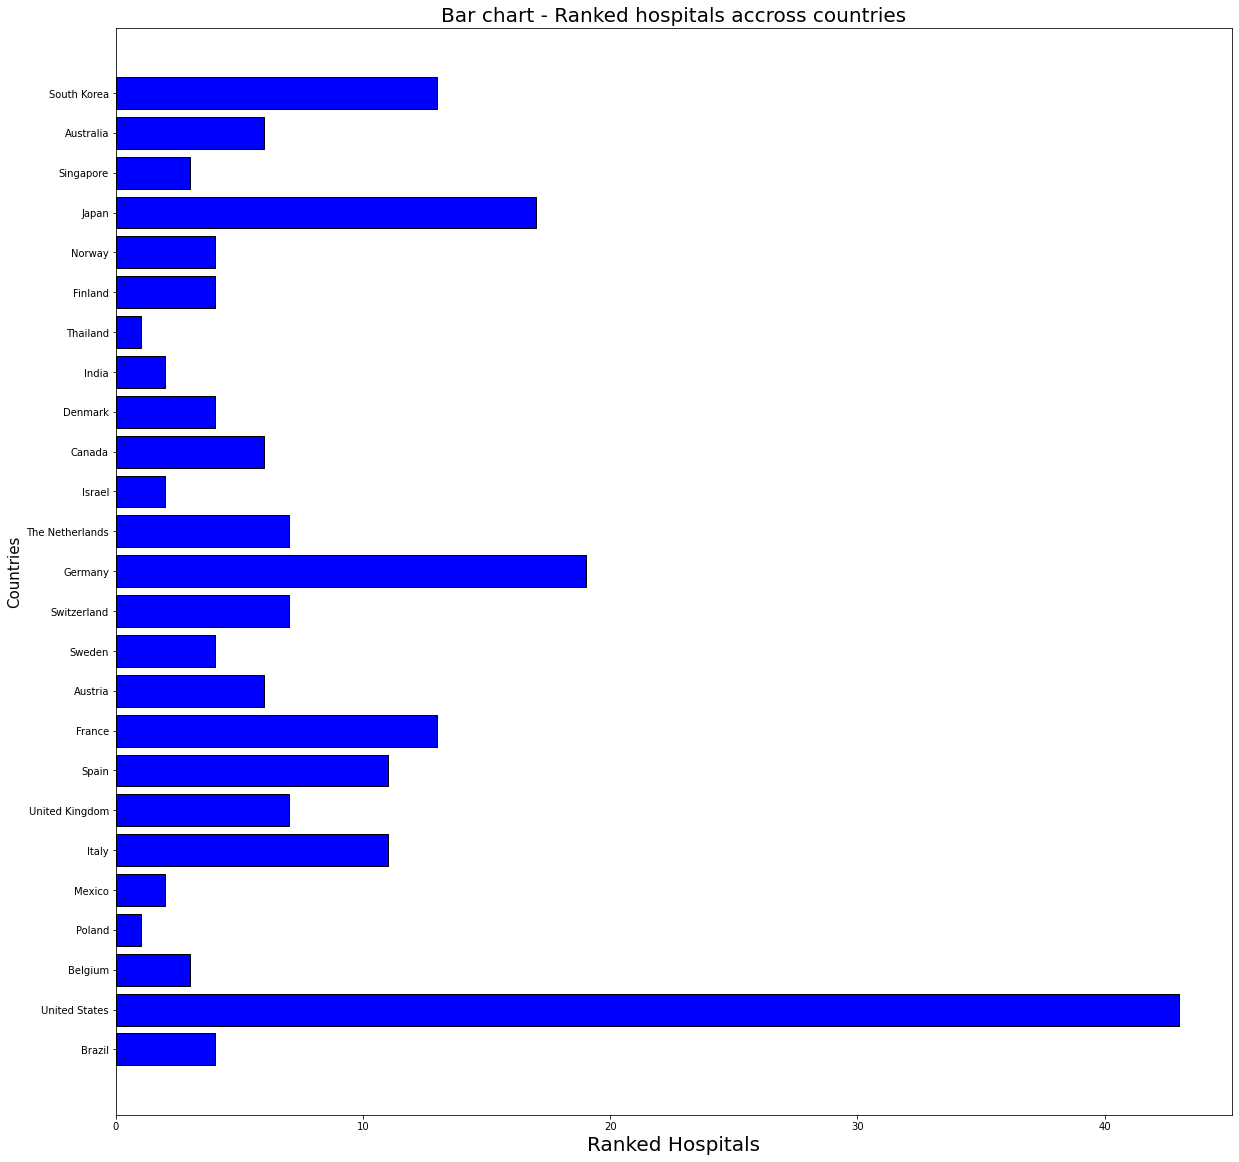

In [175]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()

# we want our y-axis to be the different countries 
# our x-axis should be the number of ranked hospitals
# x and y should be of the same length


countries = covid_df['Country']
x = np.arange (len(countries)) #what does this line do

y = covid_df['Ranked Hospitals']


plt.barh (x, y, color = 'blue', edgecolor = 'black')
# set even space between y values
plt.yticks (x, countries)

plt.rcParams["figure.figsize"] = (20,30)
plt.xlabel('Ranked Hospitals', fontsize = 20)
plt.ylabel('Countries', fontsize = 15)
plt.title("Bar chart - Ranked hospitals accross countries", fontsize = 20)

plt.show()

**we see that the US has way more ranked hospitals than any other country, but I would guess that it does not translate to less covid cases??**

**let's plot those values separately in a bar graph to see potential correlation?**

Text(0.5, 1.0, 'Bar chart - Covid cases in the last 7 days')

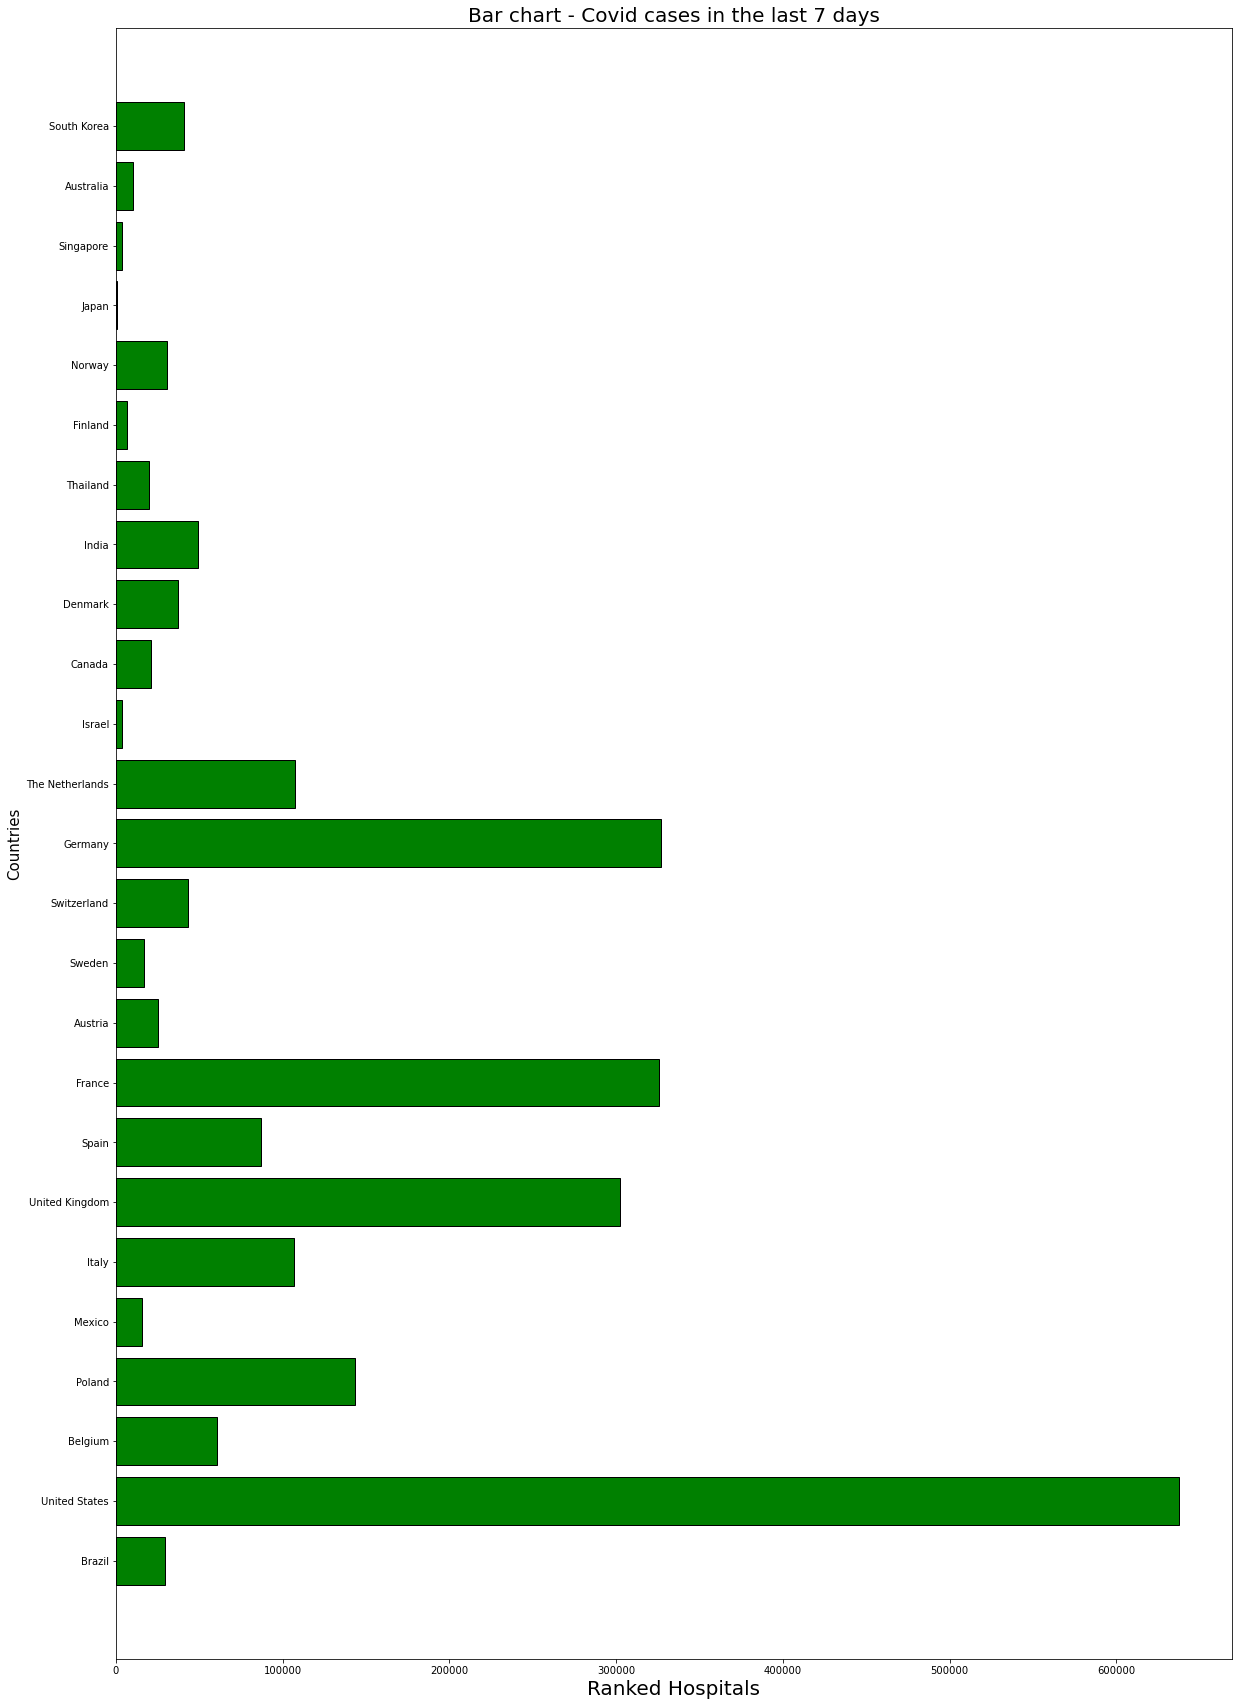

In [191]:
z = covid_df['Cases in last 7 days']

plt.barh (x , z, color = 'green', edgecolor = 'black')


plt.yticks (x, countries)

plt.rcParams["figure.figsize"] = (20,20)
plt.xlabel('Ranked Hospitals', fontsize = 20)
plt.ylabel('Countries', fontsize = 15)
plt.title("Bar chart - Covid cases in the last 7 days", fontsize = 20)
